# Table of contents

### [Lab | Cleaning numerical data](#cleaning_numerical_data)
### [Lab | Cleaning categorical data](#cleaning_categorical_data)
### [Lab | Feature extraction](#feature_extraction)

<a id='cleaning_numerical_data'></a>
# Lab | Cleaning numerical data


## Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

## Some business Objectives:

Retain customers

Analyze relevant customer data

Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

## Instructions

1.	Import the necessary libraries.
2.	Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
3.	First look at its main features (head, shape, info).
4.	Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
5.	Change effective to date column to datetime format.
6.	Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df
7.	Plot a correlation matrix, comment what you see.
8.	Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)
9.	Comment what you can see in the plots.
10.	Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
11.	Did you find outliers? Comment what you will do with them.
12.	Check all columns for NaN values. Decide what (if anything) you will need to do with them.


### Initial data setup

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [3]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
customer_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer,9134,9134,BU79786,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9134,5,California,3150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Lifetime Value,9134.0,NaN,NaN,NaN,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
Response,9134,2,No,7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coverage,9134,3,Basic,5568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,9134,5,Bachelor,2748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Effective To Date,9134,59,1/10/11,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmploymentStatus,9134,5,Employed,5698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,9134,2,F,4658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,9134.0,NaN,NaN,NaN,37657.380009,30379.904734,0.0,0.0,33889.5,62320.0,99981.0


In [5]:
customer_df.columns = customer_df.columns.str.lower().str.replace(' ','_')
customer_df = customer_df.rename(columns={'employmentstatus':'employment_status'})
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])

In [6]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Separating variables

In [7]:
customer_df.shape

(9134, 24)

In [8]:
for col in customer_df:
    print(col,'=',customer_df[col].nunique())

customer = 9134
state = 5
customer_lifetime_value = 8041
response = 2
coverage = 3
education = 5
effective_to_date = 59
employment_status = 5
gender = 2
income = 5694
location_code = 3
marital_status = 3
monthly_premium_auto = 202
months_since_last_claim = 36
months_since_policy_inception = 100
number_of_open_complaints = 6
number_of_policies = 9
policy_type = 3
policy = 9
renew_offer_type = 4
sales_channel = 4
total_claim_amount = 5106
vehicle_class = 6
vehicle_size = 3


All the columns with <10 uniques will be treated as discrete. All columns with thousands of values are continuous.
I need a closer look at the columns inbetween to make a decision. Before that, I will separate the categorical columns and differentiate only the numerical columns between continuous and discrete.

In [9]:
cat_df = customer_df.select_dtypes('object')
customer_num = customer_df.drop(columns=cat_df.columns)

display(cat_df.head())
display(customer_num.head())


,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,2011-02-24,56274,69,32,5,0,1,384.811147
1,6979.535903,2011-01-31,0,94,13,42,0,8,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,0,2,566.472247
3,7645.861827,2011-01-20,0,106,18,65,0,7,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,0,1,138.130879


In [10]:
discrete_columns = []
for col in customer_num:
    if customer_num[col].nunique() <10:
        discrete_columns.append(col)
    else:
        pass

discrete_columns

['number_of_open_complaints', 'number_of_policies']

In [11]:
continuous_columns = []
for col in customer_num:
    if customer_num[col].nunique() >1000:
        continuous_columns.append(col)
    else:
        pass

continuous_columns

['customer_lifetime_value', 'income', 'total_claim_amount']

In [12]:
copy = customer_num.drop(columns=discrete_columns)
copy = copy.drop(columns=continuous_columns)
copy.describe(include='all').T

C:\Users\luana\AppData\Local\Temp\ipykernel_7556\253837829.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  copy.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
effective_to_date,9134,59,2011-01-10,195,2011-01-01,2011-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_premium_auto,9134.0,NaN,NaT,NaN,NaT,NaT,93.219291,34.407967,61.0,68.0,83.0,109.0,298.0
months_since_last_claim,9134.0,NaN,NaT,NaN,NaT,NaT,15.097,10.073257,0.0,6.0,14.0,23.0,35.0
months_since_policy_inception,9134.0,NaN,NaT,NaN,NaT,NaT,48.064594,27.905991,0.0,24.0,48.0,71.0,99.0


In [13]:
# I will treat effective_to_date as discrete, since it can be only be days from January or March 2011
copy['effective_to_date'].unique() 

array(['2011-02-24T00:00:00.000000000', '2011-01-31T00:00:00.000000000',
       '2011-02-19T00:00:00.000000000', '2011-01-20T00:00:00.000000000',
       '2011-02-03T00:00:00.000000000', '2011-01-25T00:00:00.000000000',
       '2011-01-18T00:00:00.000000000', '2011-01-26T00:00:00.000000000',
       '2011-02-17T00:00:00.000000000', '2011-02-21T00:00:00.000000000',
       '2011-01-06T00:00:00.000000000', '2011-02-06T00:00:00.000000000',
       '2011-01-10T00:00:00.000000000', '2011-01-17T00:00:00.000000000',
       '2011-01-05T00:00:00.000000000', '2011-02-27T00:00:00.000000000',
       '2011-01-14T00:00:00.000000000', '2011-01-21T00:00:00.000000000',
       '2011-02-05T00:00:00.000000000', '2011-01-29T00:00:00.000000000',
       '2011-02-28T00:00:00.000000000', '2011-02-12T00:00:00.000000000',
       '2011-02-02T00:00:00.000000000', '2011-02-07T00:00:00.000000000',
       '2011-01-22T00:00:00.000000000', '2011-02-13T00:00:00.000000000',
       '2011-01-15T00:00:00.000000000', '2011-01-08

In [14]:
copy['monthly_premium_auto'].unique()
# I will treat as continuous because too many different values.
# Even though these are all integers, I will assume those can be any number in the range, including non integers

array([ 69,  94, 108, 106,  73,  67, 101,  71,  93, 110,  70,  64,  72,
        74,  79,  61, 111, 139,  80,  63, 237,  65,  62, 117,  91,  90,
        66,  99, 103, 172,  92, 104, 113, 124, 105, 100, 112,  97,  95,
       102, 186,  77,  96,  76, 119,  88, 109, 107, 130,  85,  98, 133,
        86,  78,  83,  68, 192, 118,  89, 140, 127, 168, 126,  82, 115,
       217, 114, 138,  81, 255, 150, 123, 116, 190, 159,  84, 152, 136,
       245, 135, 128, 225, 132, 153, 121, 154, 161, 156, 171,  87, 244,
       183, 176, 230, 129, 177, 196, 131, 276, 253, 137, 180, 203, 147,
       165, 198, 125, 193, 271, 188, 142, 206, 182, 189, 160, 295, 210,
       134, 239, 256, 173, 285, 148, 197, 199, 214, 175, 167, 194, 164,
       181, 222, 215, 283, 169, 248, 223, 273, 151, 213, 145, 185, 287,
       297, 201, 149, 146, 235, 268, 211, 187, 141, 242, 170, 122, 143,
       155, 166, 212, 249, 240, 191, 195, 216, 144, 179, 232, 158, 207,
       184, 238, 229, 220, 178, 204, 281, 234, 218, 275, 209, 26

In [15]:
# Those are all entire numbers ranging from 0 to 35 months. I will treat them as discrete
copy['months_since_last_claim'].unique() 

array([32, 13, 18, 12, 14,  0, 17, 23, 27,  9, 21, 11, 31,  8,  4, 30, 22,
       15, 33,  1, 19, 28, 10,  7,  3,  5, 20, 24, 29, 34,  6, 35,  2, 16,
       26, 25], dtype=int64)

In [16]:
# Those are all entire numbers ranging from 0 to 99 months. I will treat them as discrete
copy['months_since_policy_inception'].unique()

array([ 5, 42, 38, 65, 44, 94, 13, 68,  3,  7, 87, 82, 25, 10, 50, 59,  1,
       21, 49, 91, 47, 64, 54,  6, 14, 56, 17, 40, 62, 86, 79, 15, 32, 28,
       16,  4, 57, 77, 95, 26, 53, 12, 98, 36, 71, 60, 20,  0, 27, 48, 33,
       83, 30, 69, 90, 81, 84, 88, 18, 11, 85, 93, 34, 89,  2, 70, 37, 43,
        8, 35, 99, 55, 75, 51, 92, 29, 63, 61, 46, 41, 31, 45, 67, 22, 23,
        9, 72, 96, 58, 66, 73, 39, 19, 97, 52, 76, 78, 80, 74, 24],
      dtype=int64)

In [17]:
# After taking these decisions, any columns with > 200 values can be treated as continuous for this dataset

def discrete(dataframe, limit_uniques):
    discrete_columns = []
    for col in dataframe:
        if dataframe[col].nunique() <= limit_uniques:
            discrete_columns.append(col)
        else:
            pass
    discrete_df = dataframe[discrete_columns]
    return discrete_df

discrete_df = discrete(customer_num, 200)
discrete_df

,effective_to_date,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2011-02-24,32,5,0,1
1,2011-01-31,13,42,0,8
2,2011-02-19,18,38,0,2
3,2011-01-20,18,65,0,7
4,2011-02-03,12,44,0,1
...,...,...,...,...,...
9129,2011-02-10,18,89,0,2
9130,2011-02-12,14,28,0,1
9131,2011-02-06,9,37,3,2
9132,2011-02-03,34,3,0,3


In [18]:
continuous_df = customer_num.drop(columns=discrete_df.columns)
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


### Plotting correlations and distributions

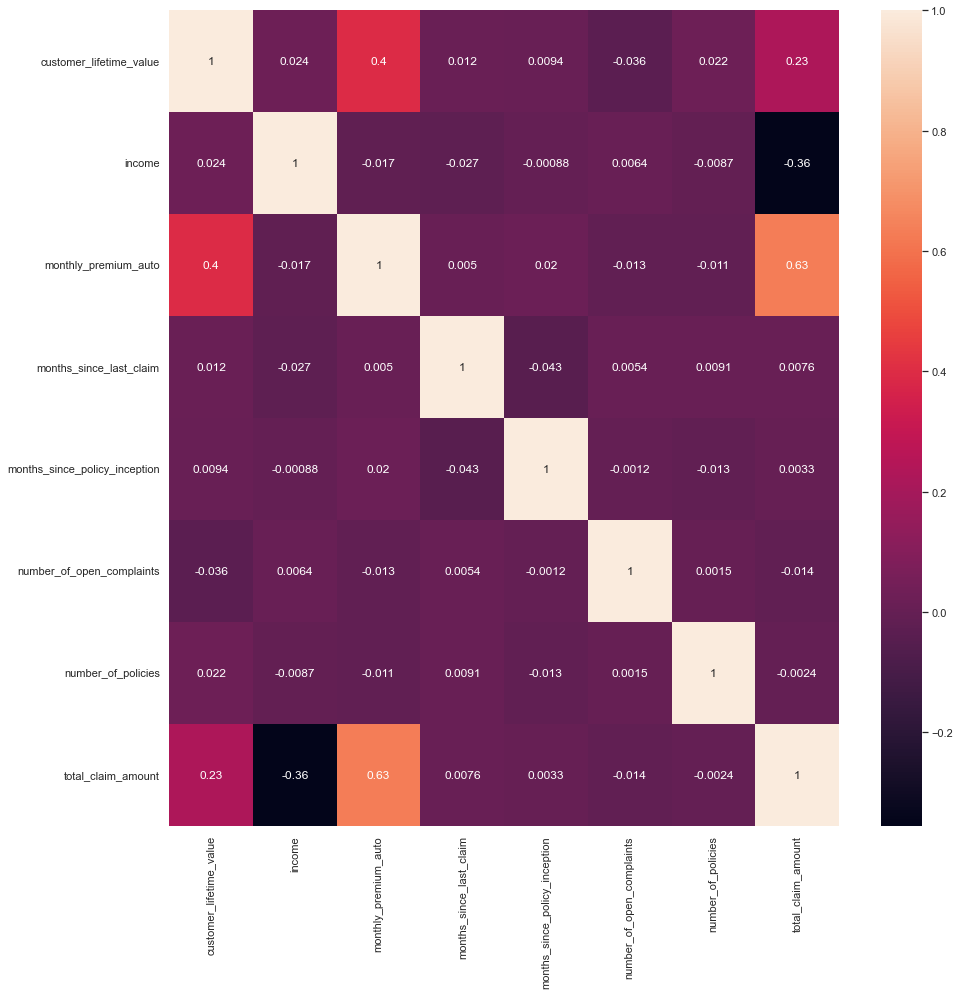

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [19]:
correlations_matrix = customer_df.corr()
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(correlations_matrix, annot=True)
plt.show()
display(correlations_matrix)

# The strongest positive correlation is observed between monthly premium and total claim amount, 
# but also the customer lifetime value has a positive correlation with the premium. 
# The next relatively relevant correlation is observed between total claim amount and income, but this time a negative one.
# Lastly, customer life time also correlates with total claim amount, but this correlation is not as strong as the others.
# There is no alarming correlation between variables that can be seen on the heatmap.

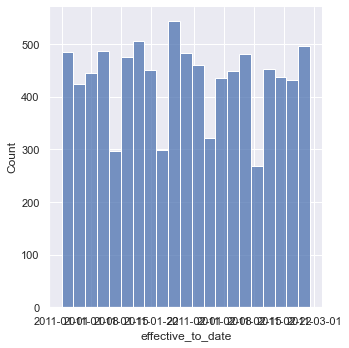

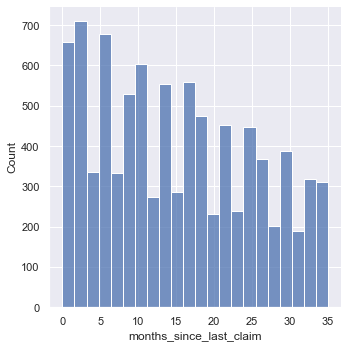

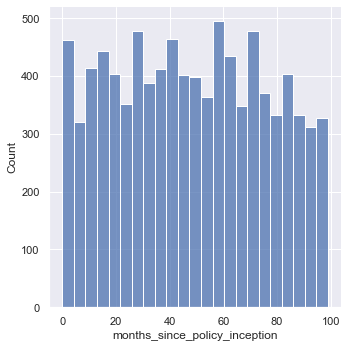

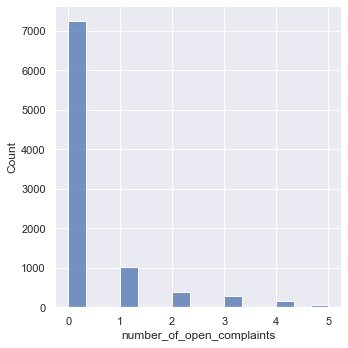

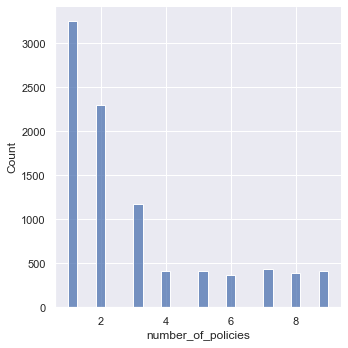

In [20]:
for col in discrete_df:
    sns.displot(discrete_df[col])
    plt.show()

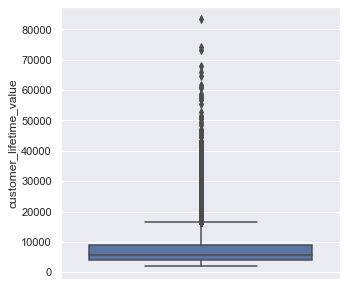

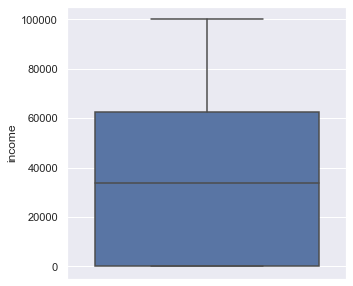

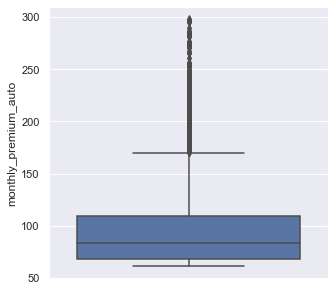

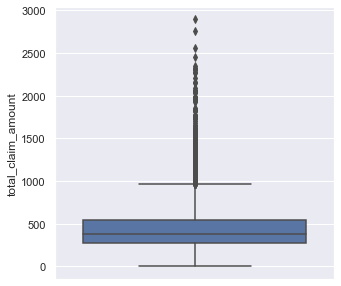

In [21]:
for col in continuous_df:
    sns.set(rc = {'figure.figsize':(5,5)})
    sns.boxplot(y=continuous_df[col])
    plt.show()

### Checking for outliers and NaNs

In [22]:
# The boxplot suggests that there are outliers in the numerical data, except for income. I will check with a function

def find_outliers(dataframe):
    q1 =dataframe.quantile(0.25)
    q3=dataframe.quantile(0.75)
    IQR=q3-q1
    outliers = dataframe[((dataframe<(q1-1.5*IQR)) | (dataframe>(q3+1.5*IQR)))]

    return outliers


for col in continuous_df:
    outliers = find_outliers(continuous_df[col])
    print(col)
    print('number of outliers: '+ str(len(outliers)))
    print('max outlier value: '+ str(outliers.max()))
    print('min outlier value: '+ str(outliers.min()))
    outliers

customer_lifetime_value
number of outliers: 817
max outlier value: 83325.38119
min outlier value: 16414.04415
income
number of outliers: 0
max outlier value: nan
min outlier value: nan
monthly_premium_auto
number of outliers: 430
max outlier value: 298
min outlier value: 171
total_claim_amount
number of outliers: 453
max outlier value: 2893.239678
min outlier value: 962.159318


In [23]:
# I will keep all values, because I do not want to lose any data yet.
# I will check later if these are negatively affecting the model

In [24]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [25]:
# No NaN values to be dealt with

<a id='cleaning_categorical_data'></a>

# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

## Instructions
1. Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

2. Find all of the categorical data. Save it in a categorical_df variable.

3. Check for NaN values.

4. Check all unique values of columns.

5. Check dtypes. Do they all make sense as categorical data?

6. Does any column contain alpha and numeric data? Decide how to clean it.

7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [26]:
# using the categorical data which was extracted before

cat_df.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [27]:
cat_df.isna().sum() # No NaN found 

customer             0
state                0
response             0
coverage             0
education            0
employment_status    0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [35]:
cat_df.dtypes # all objects, no cleaning needed

customer             object
state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [31]:
cat_df.nunique() #customers obviously have unique numbers so I will not check their uniques

customer             9134
state                   5
response                2
coverage                3
education               5
employment_status       5
gender                  2
location_code           3
marital_status          3
policy_type             3
policy                  9
renew_offer_type        4
sales_channel           4
vehicle_class           6
vehicle_size            3
dtype: int64

In [41]:
cat_df = cat_df.drop(columns='customer')

for col in cat_df:
    print(col)
    print(cat_df[col].unique())

state
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response
['No' 'Yes']
coverage
['Basic' 'Extended' 'Premium']
education
['Bachelor' 'Master' 'High School or Below' 'Doctor']
employment_status
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender
['F' 'M']
location_code
['Suburban' 'Rural' 'Urban']
marital_status
['Married' 'Single' 'Divorced']
policy_type
['Corporate Auto' 'Personal Auto' 'Special Auto']
policy
['L3' 'L2' 'L1']
renew_offer_type
['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel
['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size
['Medsize' 'Small' 'Large']


In [42]:
# the policy is repeating the information from policy type.
# I will drop the first part of the policy and keep to separate columns

cat_df['policy'] = cat_df['policy'].str.split(' ').str[-1]
cat_df['policy'].unique()

array(['L3', 'L2', 'L1'], dtype=object)

In [43]:
# in education, bachelor and college are probably the same thing, so I will standartise it

cat_df['education'] = cat_df['education'].replace('College','Bachelor')
cat_df['education'].unique()

array(['Bachelor', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

<a id='feature_extraction'></a>
# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

## Instructions
1. Open the categoricals variable we created before.
categoricals = data.select_dtypes(np.object)
categoricals.head()
2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

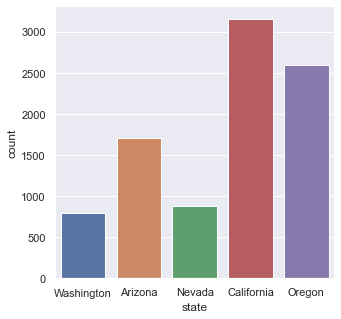

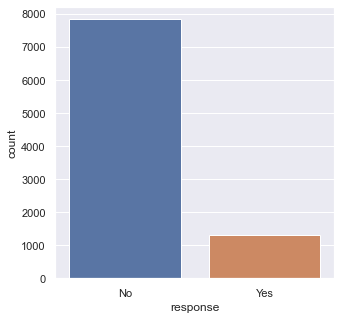

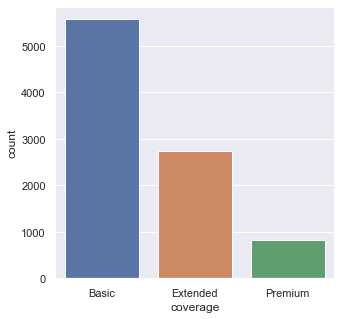

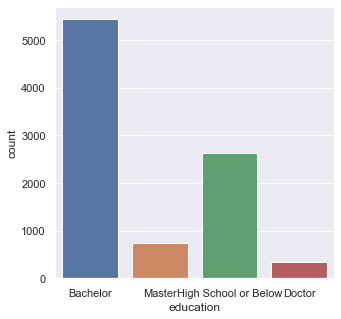

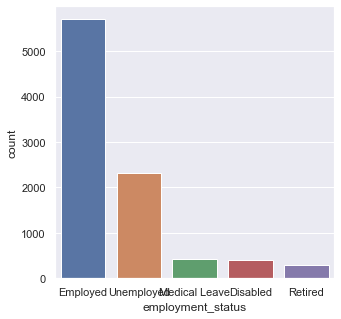

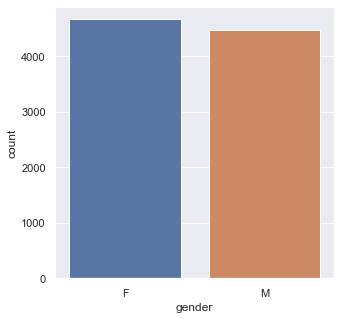

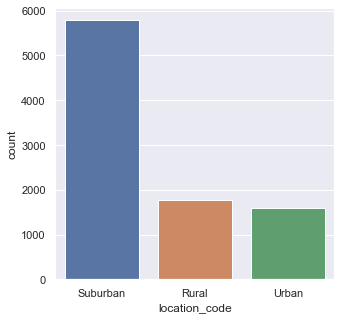

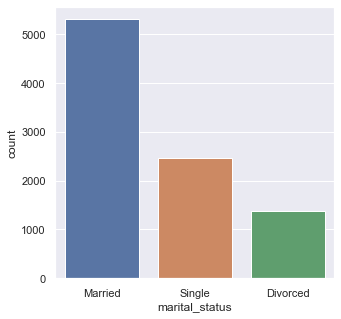

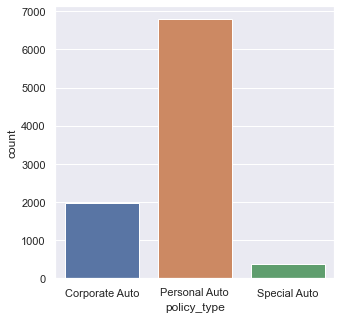

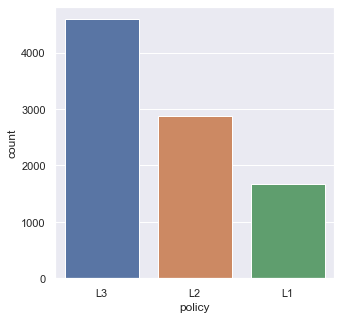

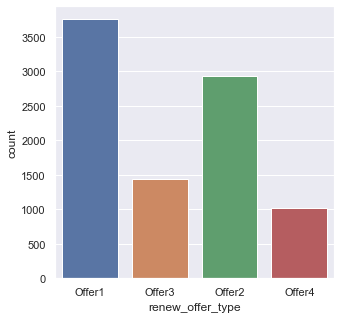

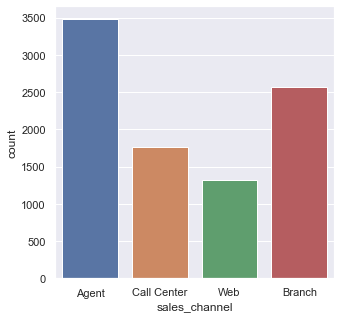

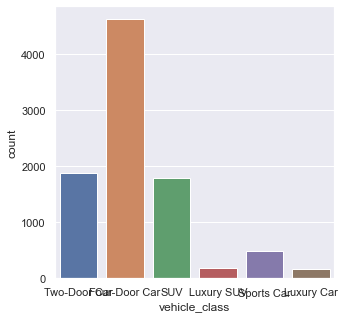

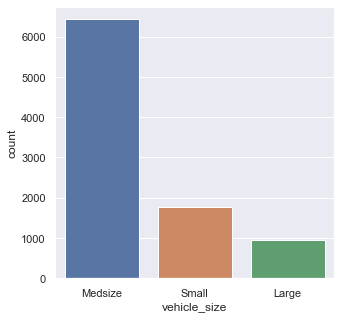

In [46]:
for col in cat_df:
    sns.countplot(x=cat_df[col])
    plt.show()

In [47]:
# I will merge "Luxury SUV" and "Luxury Car" for simplification


cat_df['vehicle_class'] = cat_df['vehicle_class'].replace('Luxury SUV','Luxury Car')
cat_df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury Car', 'Sports Car'],
      dtype=object)

In [51]:
# I will merge "Master" and "Doctor" for simplification


cat_df['education'] = cat_df['education'].replace('Master','Postgraduate')
cat_df['education'] = cat_df['education'].replace('Doctor','Postgraduate')
cat_df['education'].unique()

array(['Bachelor', 'Postgraduate', 'High School or Below'], dtype=object)

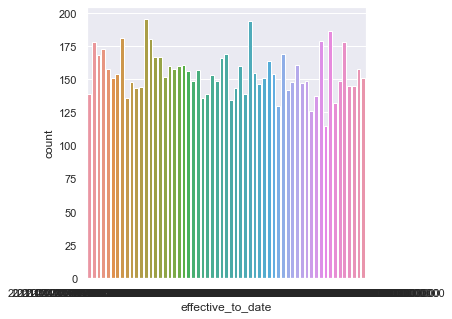

In [50]:
sns.countplot(x=discrete_df['effective_to_date'])
plt.show()

In [52]:
# I dont think this column is bringing relevant information, I will drop it
discrete_df = discrete_df.drop(columns='effective_to_date')
discrete_df.head()

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
